# **Muhammad Zalfa Thoriq** 
# **1301194473**
# **IF - 43 - 01**

# **TUGAS BESAR 1**
# **MECHINE LEARNING**
# **CLUSTERING**

**IMPORT DATA & LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

**EXPLORATION & PROCESSING DATA**

In [ ]:
data_1 = pd.read_csv('kendaraan_train.csv')
data_1.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [ ]:
data_2 = pd.read_excel('kendaraan_test.xlsx')
data_2.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
# Menggabungkan data train and data test
kolom = ['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan', 'Tertarik']
data_gab = data_1[kolom].append(data_2, ignore_index=True) 
data_gab

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
333465,Pria,41.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,78.0,20.0,0
333466,Pria,39.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,124.0,200.0,0
333467,Pria,33.0,1.0,0.0,1.0,< 1 Tahun,Tidak,2630.0,152.0,152.0,0
333468,Wanita,71.0,1.0,0.0,0.0,1-2 Tahun,Pernah,2630.0,25.0,226.0,0


In [ ]:
#Check data missing values dari setiap kolom  
print('Data Type Tiap Column: \n')
print(data_gab.dtypes, '\n')
print('Banyak Missing Values Tiap Column: \n')
print(data_gab.isna().sum())

Data Type Tiap Column: 

Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object 

Banyak Missing Values Tiap Column: 

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [ ]:
#Drop data 
data_gab = data_gab.dropna()
len(data_gab)

218707

In [ ]:
#drop kolom yang tidak digunakan
data_gab = data_gab.drop(columns=['Tertarik'])
data_gab.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
5,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0
8,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0


**OUTLIERS METHOD**

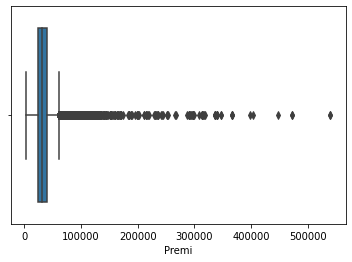

In [ ]:
#boxplot untuk melihat data outlier
sns.boxplot(x = 'Premi',data = data_gab)

1894.75 61836.75


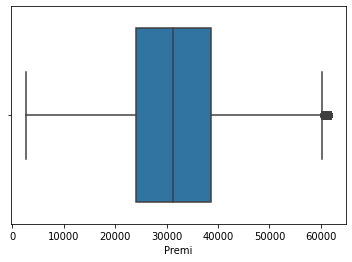

In [ ]:
#menentukan nilai upperbound dan lower bound
#diambil dari nilai quantile data

q1 = data_gab['Premi'].quantile(0.25)
q3 = data_gab['Premi'].quantile(0.75)
med = q3-q1
lower = q1-1.5*med
upper = q3+1.5*med
print(lower, upper)

#untuk data outlier diatas dari upperbound, maka akan direplace dengan nilai upperbound
data_gab = data_gab[(data_gab['Premi']>lower) & (data_gab['Premi']<upper)]

#plot data setelah tidak ada outlier
sns.boxplot(x = 'Premi', data = data_gab)

**HEATMAP PLOT**

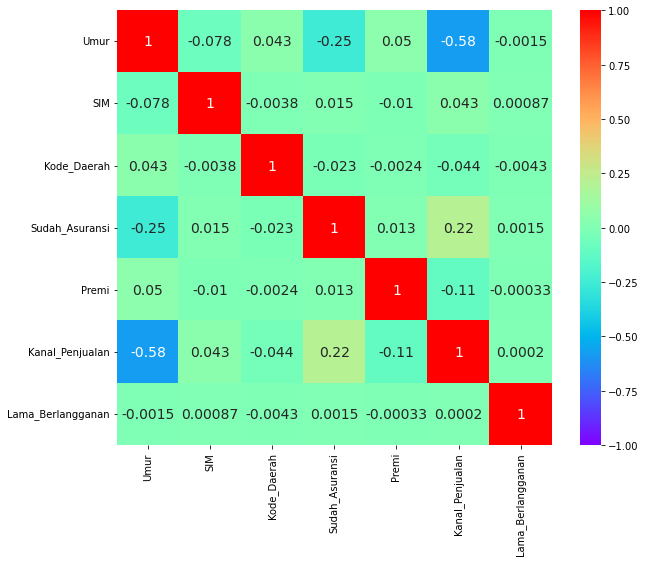

In [ ]:
#heatmap plot untuk melihat korelasi dari dataset 
#antar data tidak berkorelasi karena dataset banyak berbentuk categorial
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_gab.corr(), annot=True, ax=ax, square=True, cmap='rainbow', vmin=-1,vmax=1, annot_kws={'size': 14})
plt.show()

**CATEGORIAL & LABELLING DATA**

In [ ]:
from sklearn.preprocessing import LabelEncoder

#labeling untuk data categorical ordinal
le_Umur_Kendaraan = LabelEncoder()
data_gab['Umur_Kendaraan'] = le_Umur_Kendaraan.fit_transform(data_gab['Umur_Kendaraan'])

In [ ]:
#nominal
dummies = pd.get_dummies(data_gab['Jenis_Kelamin'], prefix='kelamin')
data_gab = pd.concat([data_gab, dummies], axis=1)
data_gab = data_gab.drop(['Jenis_Kelamin'], axis = 1)

dummies = pd.get_dummies(data_gab['Kode_Daerah'], prefix='daerah')
data_gab = pd.concat([data_gab, dummies], axis=1)
data_gab = data_gab.drop(['Kode_Daerah'], axis = 1)

dummies = pd.get_dummies(data_gab['SIM'], prefix='sim')
data_gab = pd.concat([data_gab, dummies], axis=1)
data_gab = data_gab.drop(['SIM'], axis = 1)

dummies = pd.get_dummies(data_gab['Sudah_Asuransi'], prefix='asuransi')
data_gab = pd.concat([data_gab, dummies], axis=1)
data_gab = data_gab.drop(['Sudah_Asuransi'], axis = 1)

dummies = pd.get_dummies(data_gab['Kendaraan_Rusak'], prefix='kendaraan_rusak')
data_gab = pd.concat([data_gab, dummies], axis=1)
data_gab = data_gab.drop(['Kendaraan_Rusak'], axis = 1)

In [ ]:
data_gab

,Umur,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,kelamin_Pria,kelamin_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.153846,1,0.429030,0.932099,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0.430769,2,0.391379,0.172840,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0.584615,0,0.000000,0.759259,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
5,0.015385,1,0.339606,0.932099,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8,0.000000,1,0.475600,0.981481,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333465,0.323077,0,0.000000,0.475309,0.034602,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
333466,0.292308,0,0.000000,0.759259,0.657439,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
333467,0.200000,1,0.000000,0.932099,0.491349,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
333468,0.784615,0,0.000000,0.148148,0.747405,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


**SCALLING MAP METHOD**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#scaling data dengan minmax scaler agar menghasilkan pada rentang yang sama[0,1]
scaler = MinMaxScaler()
data_gab['Premi'] = scaler.fit_transform(data_gab[['Premi']])
data_gab['Umur'] = scaler.fit_transform(data_gab[['Umur']])
data_gab['Lama_Berlangganan'] = scaler.fit_transform(data_gab[['Lama_Berlangganan']])
data_gab['Kanal_Penjualan'] = scaler.fit_transform(data_gab[['Kanal_Penjualan']])
data_gab

,Umur,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,kelamin_Pria,kelamin_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak
0,0.153846,1,0.429030,0.932099,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0.430769,2,0.391379,0.172840,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
3,0.584615,0,0.000000,0.759259,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
5,0.015385,1,0.339606,0.932099,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
8,0.000000,1,0.475600,0.981481,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333465,0.323077,0,0.000000,0.475309,0.034602,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
333466,0.292308,0,0.000000,0.759259,0.657439,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
333467,0.200000,1,0.000000,0.932099,0.491349,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
333468,0.784615,0,0.000000,0.148148,0.747405,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0


**K-MEANS METHOD**

In [ ]:
#model kmeans dengan bentuk class
class Kmeans:
  def __init__(self, k, max_iter):
    self.k = k
    self.max_iter = max_iter
    self.centroid = []

  #euclidean
  def euclidean(self, x1, x2):
    distance = np.sqrt(((x2-x1)**2).sum(axis=0))
    return distance

  def fit(self,data):

    #label cluster awal diset default menjadi -1 terlebih dahulu 
    labels = [-1]*len(data)

    #pemilihan cluster awal secara random sebanyak k
    self.centroid = data.sample(self.k)
    self.centroid = self.centroid.to_numpy()

    data = data.to_numpy()

    for i in range(self.max_iter):
      #nilai inertia untuk menghitung wcss yang berguna untuk elbow method
      self.inertia = 0
      #clusters untuk pengumpulan data berdasarkan cluster, digunakan untuk menghitung mean pada centroid nanti
      clusters = [[] for i in range(self.k)]

      for x in range(len(data)):
        
        #menghitung jarak tiap data ke tiap centroid
        distance = []
        for indeks in range(len(self.centroid)):
          distance.append(self.euclidean(data[x], self.centroid[indeks]))
        #memasukkan data ke cluster terdekat
        label = distance.index(min(distance))
        clusters[label].append(data[x])
        labels[x] = label

        self.inertia += (min(distance))**2

      #pergantian tiap centroid dengan mean tiap cluster
      temp = np.copy(self.centroid)
      for indeks in range(self.k):
        self.centroid[indeks] = np.mean(clusters[indeks], axis=0)

      #pengecekan kondisi berhenti k-means, apakah centroid sama dengan sebelumnya atau tidak
      condition = temp == self.centroid
      if condition.all():
        break
    
    #function fit mengembalikan label cluster tiap data
    return labels

**Percobaan K-MEANS**

In [ ]:
#percobaan dengan k=2 dan max_iterasi = 500
max_iter = 500
k = 2
model_1 = Kmeans(k, max_iter)
label_1 = model_1.fit(data_gab)

In [ ]:
from sklearn.decomposition import PCA
#PCA befungsi untuk mereduksi semua kolom feature menjadi 2 dimensi agar lebih mudah melihat visual persebaran cluster
pca = PCA(n_components=2)
pca = pca.fit_transform(data_gab)
data_frame = pd.DataFrame()

data_frame['X-pca'] = pca[:,0]
data_frame['Y-pca'] = pca[:,1]
data_frame['cluster'] = label_1


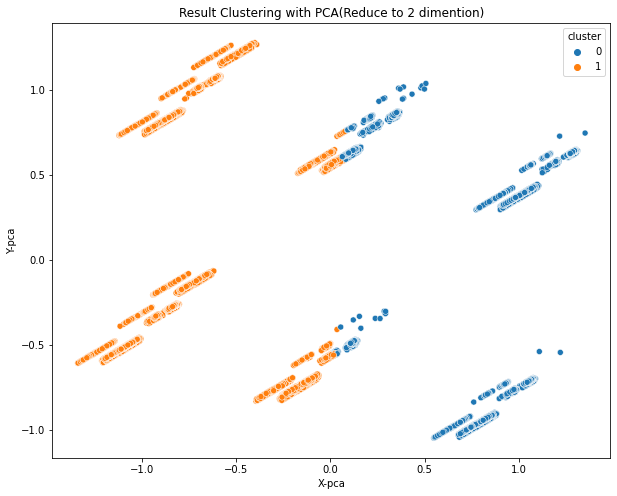

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data_frame, x="X-pca", y="Y-pca", hue="cluster")
plt.title('Result Clustering with PCA(Reduce to 2 dimention)')
plt.show()

**ELBOW METHOD**


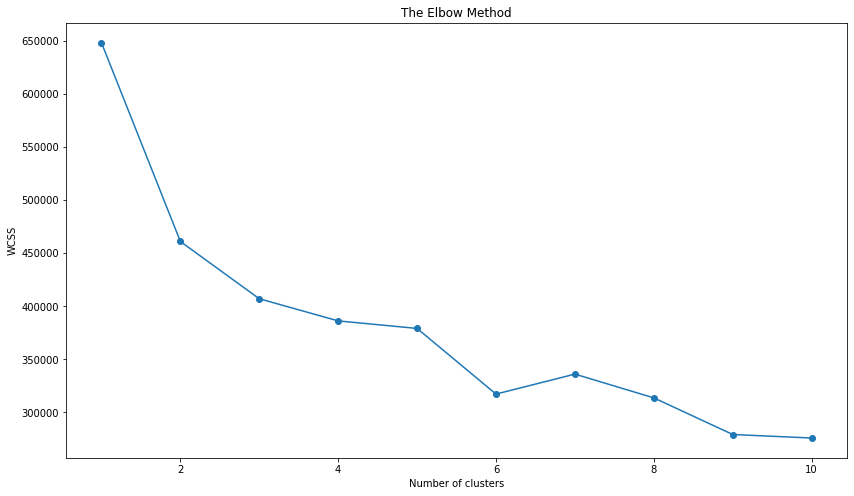

In [ ]:
wcss = []
for i in range(1, 11):

  kmeans = Kmeans(i, 500)
  kmeans.fit(data_gab)
  wcss.append(kmeans.inertia)

plt.figure(figsize=(14,8))
plt.plot(range(1, 11), wcss)
plt.scatter(range(1, 11), wcss)
#memberikan label plot dengan judul The Elbow Method
plt.title('The Elbow Method')
#memberikan label x dengan nama Number of clusters
plt.xlabel('Number of clusters')
#memberikan label y dengan nama WCSS
plt.ylabel('WCSS')
#menampilkan plot
plt.show()

In [ ]:
#menggabungkan data hasil eksplorasi dengan label clusternya masing-masing
data_cluster = data_gab.copy()
data_cluster["Cluster"] = label_1
data_cluster.head()

,Umur,Umur_Kendaraan,Premi,Kanal_Penjualan,Lama_Berlangganan,kelamin_Pria,kelamin_Wanita,daerah_0.0,daerah_1.0,daerah_2.0,daerah_3.0,daerah_4.0,daerah_5.0,daerah_6.0,daerah_7.0,daerah_8.0,daerah_9.0,daerah_10.0,daerah_11.0,daerah_12.0,daerah_13.0,daerah_14.0,daerah_15.0,daerah_16.0,daerah_17.0,daerah_18.0,daerah_19.0,daerah_20.0,daerah_21.0,daerah_22.0,daerah_23.0,daerah_24.0,daerah_25.0,daerah_26.0,daerah_27.0,daerah_28.0,daerah_29.0,daerah_30.0,daerah_31.0,daerah_32.0,daerah_33.0,daerah_34.0,daerah_35.0,daerah_36.0,daerah_37.0,daerah_38.0,daerah_39.0,daerah_40.0,daerah_41.0,daerah_42.0,daerah_43.0,daerah_44.0,daerah_45.0,daerah_46.0,daerah_47.0,daerah_48.0,daerah_49.0,daerah_50.0,daerah_51.0,daerah_52.0,sim_0.0,sim_1.0,asuransi_0.0,asuransi_1.0,kendaraan_rusak_Pernah,kendaraan_rusak_Tidak,Cluster
0,0.153846,1,0.429030,0.932099,0.301038,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
1,0.430769,2,0.391379,0.172840,0.512111,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1
3,0.584615,0,0.000000,0.759259,0.183391,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
5,0.015385,1,0.339606,0.932099,0.557093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0
8,0.000000,1,0.475600,0.981481,0.072664,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0


In [ ]:
data_cluster.to_csv("DatasetFinal_1301194473.csv", index=False)